# 1단계. 데이터 전처리

### 데이터 불러오기

In [1]:
import pandas as pd
from pytimekr import pytimekr
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_set=pd.read_excel('preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx')

In [33]:
data_set

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


In [3]:
data=data_set.copy()

In [4]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


- 승차대기시간 이상값 확인

In [5]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
filtered_df = data[data['승차대기시간(분)'] < 1]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
237,2020-01-01 15:48:48.033,1,부산광역시 동구,부산광역시 동래구,496933,282839,498875,289257,2020-01-01 15:49:59.160,2020-01-01 15:50:38,2020-01-01 16:17:49,3200,1.185450,0.647333,1.832783,27.183333,12982.446896,False,True
322,2020-01-01 19:28:19.207,1,부산광역시 해운대구,부산광역시 동구,502028,288303,496944,282392,2020-01-01 19:31:16.880,2020-01-01 19:31:58,2020-01-01 19:52:52,3700,2.961217,0.685333,3.646550,20.900000,15311.755033,False,True
524,2020-01-02 09:05:15.733,1,부산광역시 영도구,부산광역시 중구,497354,275587,494559,278144,2020-01-02 09:05:26.843,2020-01-02 09:05:30,2020-01-02 09:05:31,0,0.185167,0.052617,0.237783,0.016667,9068.341981,False,False
678,2020-01-02 11:08:16.337,1,부산광역시 사상구,부산광역시 사하구,489716,282830,488745,273069,2020-01-02 11:08:16.630,2020-01-02 11:08:29,2020-01-02 11:28:57,3700,0.004883,0.206167,0.211050,20.466667,10561.619952,False,False
775,2020-01-02 12:00:22.160,1,부산광역시 서구,경상남도 김해시,492822,280552,481169,292511,2020-01-02 12:00:22.470,2020-01-02 12:00:31,2020-01-02 12:34:49,5600,0.005167,0.142167,0.147333,34.300000,12823.201740,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654388,2022-07-30 15:55:25.923,7,부산광역시 해운대구,부산광역시 영도구,501859,288721,498389,276871,2022-07-30 15:57:09.923,2022-07-30 15:57:48,2022-07-30 16:33:05,5200,1.733333,0.634617,2.367950,35.283333,13656.220696,True,False
654493,2022-07-30 21:32:19.470,7,부산광역시 동래구,부산광역시 동래구,498703,290283,500243,290125,2022-07-30 21:35:04.047,2022-07-30 21:35:27,2022-07-30 21:47:01,1800,2.742950,0.382550,3.125500,11.566667,12654.153967,True,False
654635,2022-07-31 10:53:58.983,7,부산광역시 해운대구,부산광역시 기장군,502411,291191,513006,301986,2022-07-31 10:53:59.373,2022-07-31 10:54:42,2022-07-31 11:31:34,5500,0.006500,0.710450,0.716950,36.866667,8324.696737,True,False
654752,2022-07-31 13:52:23.087,7,부산광역시 북구,부산광역시 북구,491849,290579,492610,290392,2022-07-31 13:59:03.850,2022-07-31 13:59:24,2022-07-31 14:07:20,1800,6.679383,0.335833,7.015217,7.933333,17365.611103,True,False


In [6]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
data = data[data['승차대기시간(분)'] >= 1]

# 결과 출력
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


- 접수시간 생성

In [7]:
data['접수시간']=data['접수일시'].dt.hour

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_3136\1763112670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['접수시간']=data['접수일시'].dt.hour


In [8]:
data['접수시간']

0          0
1          0
2          0
3          0
4          0
          ..
654869    21
654870    21
654871    21
654872    21
654873    23
Name: 접수시간, Length: 651337, dtype: int32

- 요일 생성하기

In [9]:
data['요일']='월'
data.loc[data['승차일시'].dt.weekday==1,'요일']='화'
data.loc[data['승차일시'].dt.weekday==2,'요일']='수'
data.loc[data['승차일시'].dt.weekday==3,'요일']='목'
data.loc[data['승차일시'].dt.weekday==4,'요일']='금'
data.loc[data['승차일시'].dt.weekday==5,'요일']='토'
data.loc[data['승차일시'].dt.weekday==6,'요일']='일'

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_3136\861225814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']='월'


In [10]:
data['요일']=data['승차일시'].dt.weekday

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_3136\4118538062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']=data['승차일시'].dt.weekday


In [11]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [12]:
time0=data['승차일시'][0]-data['승차일시'][0]
data=data.drop(data[(data['배차일시']-data['접수일시'])<=time0].index,axis=0)
data=data.drop(data[(data['승차일시']-data['배차일시'])<=time0].index,axis=0)
data=data.drop(data[(data['하차일시']-data['승차일시'])<=time0].index,axis=0)
data=data.drop(data[data['총대기시간(분)']>=6*60].index,axis=0)

In [13]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


### 이상치 제거

In [14]:
import pandas as pd

# IQR 계산
Q1 = data['총대기시간(분)'].quantile(0.25)
Q3 = data['총대기시간(분)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
filtered_data = data[(data['총대기시간(분)'] >= lower_bound) & (data['총대기시간(분)'] <= upper_bound)]

# 결과 출력
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")
filtered_data

Original data size: (651327, 21)
Filtered data size: (638315, 21)


,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
12,2020-01-01 05:06:44.297,1,부산광역시 사상구,부산광역시 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,1900,11.036767,30.308283,41.345050,17.383333,3210.950152,False,True,5,2
13,2020-01-01 05:29:11.703,1,부산광역시 해운대구,경상남도 양산시,506696,285824,490101,301659,2020-01-01 05:29:51.013,2020-01-01 06:05:49,...,9300,0.655167,35.966450,36.621617,54.333333,3724.877799,False,True,5,2
15,2020-01-01 05:32:39.097,1,부산광역시 연제구,부산광역시 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,2100,2.089550,16.842167,18.931717,10.366667,359.389316,False,True,5,2
18,2020-01-01 05:57:06.427,1,부산광역시 연제구,부산광역시 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,5500,61.793600,20.999283,82.792883,35.283333,5120.670073,False,True,5,2
19,2020-01-01 06:21:30.313,1,부산광역시 부산진구,부산광역시 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,5500,35.235833,16.442283,51.678117,35.316667,16660.328522,False,True,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [15]:
data = filtered_data

- 거리에 따른 탑승시간 맞지 않는 이상치 제거

In [16]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일'],
      dtype='object')

In [17]:
data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_3136\2313901543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5


(0.0, 15000.0)

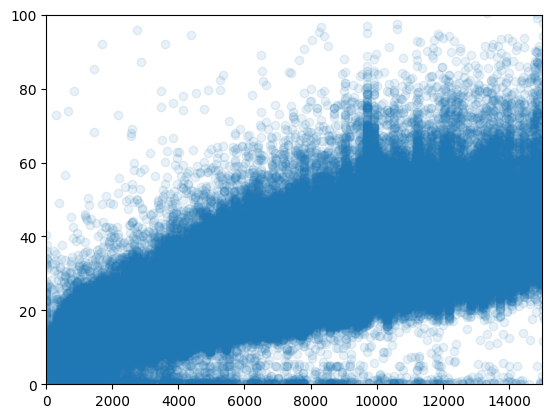

In [28]:
import matplotlib.pyplot as plt

plt.scatter(data['거리'],data['승차시간(분)'],alpha=0.1)
plt.ylim(0,100)
plt.xlim(0,15000)

(0.0, 15000.0)

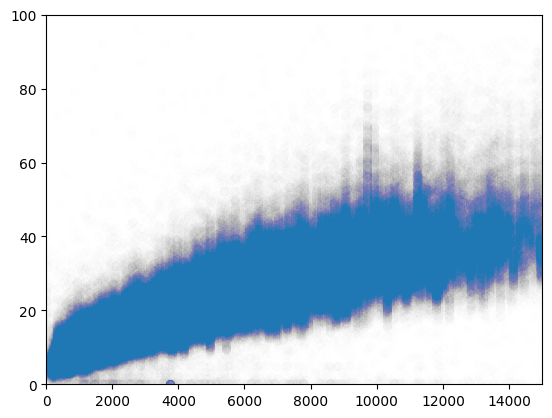

In [29]:
plt.scatter(data['거리'],data['승차시간(분)'],alpha=0.002)
plt.ylim(0,100)
plt.xlim(0,15000)

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing f

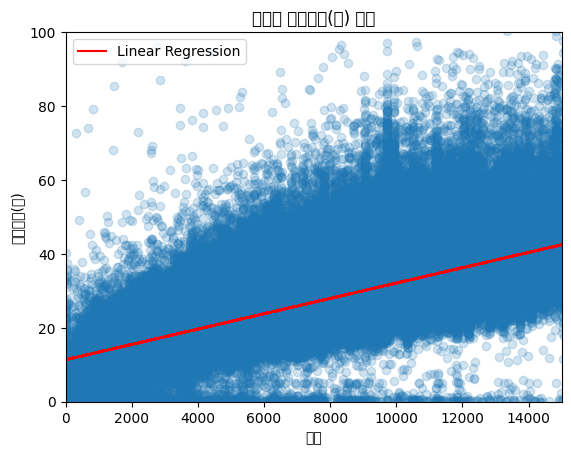

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 산점도 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 선형 회귀선 추가
slope, intercept, r_value, p_value, std_err = stats.linregress(data['거리'], data['승차시간(분)'])
regression_line = slope * data['거리'] + intercept
plt.plot(data['거리'], regression_line, color='red', label='Linear Regression')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계')
plt.legend()
plt.show()

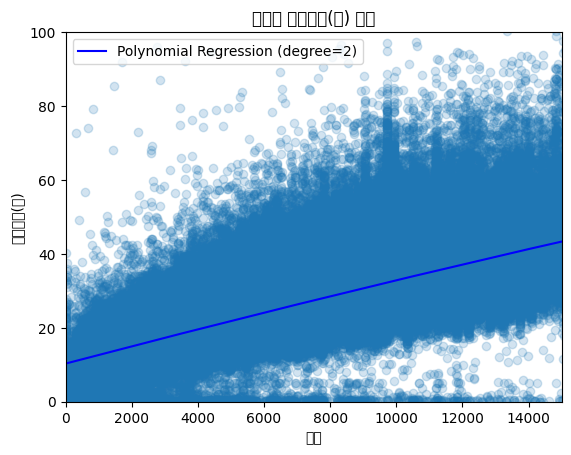

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# 산점도 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 다항 회귀 곡선 추가 (2차 다항식 예시)
p = Polynomial.fit(data['거리'], data['승차시간(분)'], 2)
plt.plot(*p.linspace(), color='blue', label='Polynomial Regression (degree=2)')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계')
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19368\3099961505.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_거리'] = np.log(data['거리'] + 1)  # 로그 변환 (0값 방지를 위해 +1)


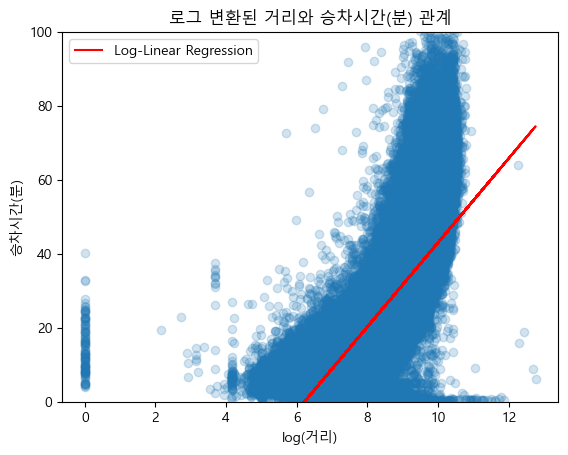

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


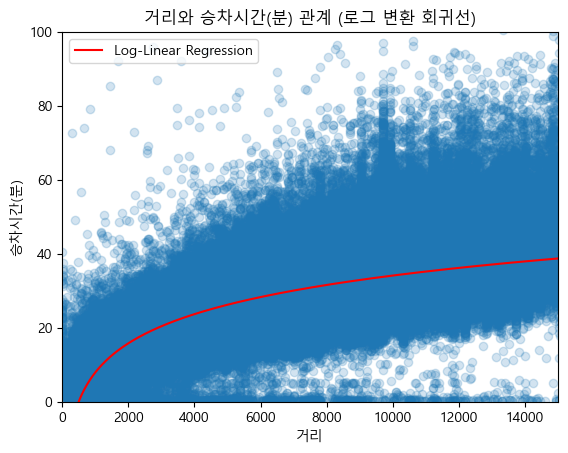

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 로그 변환
data['log_거리'] = np.log(data['거리'] + 1)  # 로그 변환 (0값 방지를 위해 +1)

# 산점도 그리기
plt.scatter(data['log_거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)

# 로그 변환된 데이터로 선형 회귀선 추가
slope, intercept, r_value, p_value, std_err = stats.linregress(data['log_거리'], data['승차시간(분)'])
regression_line = slope * data['log_거리'] + intercept
plt.plot(data['log_거리'], regression_line, color='red', label='Log-Linear Regression')

plt.xlabel('log(거리)')
plt.ylabel('승차시간(분)')
plt.title('로그 변환된 거리와 승차시간(분) 관계')
plt.legend()
plt.show()

# 원래 스케일로 변환된 회귀선 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 원래 스케일의 회귀선 추가
original_scale_regression_line = slope * np.log(np.linspace(1, 15000, 500)) + intercept
plt.plot(np.linspace(1, 15000, 500), original_scale_regression_line, color='red', label='Log-Linear Regression')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계 (로그 변환 회귀선)')
plt.legend()
plt.show()

In [135]:
# 회귀식 출력
print(f"로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = {slope:.4f} * log(거리) + {intercept:.4f}")

로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = 11.3978 * log(거리) + -70.8887


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


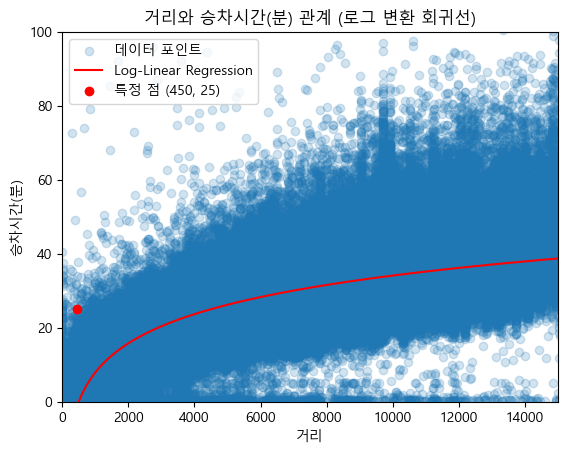

로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = 11.3978 * log(거리) + -70.8887


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 원래 스케일로 변환된 회귀선 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2, label='데이터 포인트')
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 원래 스케일의 회귀선 추가
original_scale_regression_line = slope * np.log(np.linspace(1, 15000, 500)) + intercept
plt.plot(np.linspace(1, 15000, 500), original_scale_regression_line, color='red', label='Log-Linear Regression')

# (450, 25)에 빨간색 점 추가 (원래 스케일)
plt.scatter([450], [25], color='red', zorder=5, label='특정 점 (450, 25)')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계 (로그 변환 회귀선)')
plt.legend()
plt.show()

# 회귀식 출력
print(f"로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = {slope:.4f} * log(거리) + {intercept:.4f}")


Original data size: (638315, 25)
Filtered data size: (352078, 25)


C:\Users\user\AppData\Local\Temp\ipykernel_19368\3250438655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['예측_승차시간(분)'] = slope * np.log(data['거리'] + 1) + intercept
C:\Users\user\AppData\Local\Temp\ipykernel_19368\3250438655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['오차'] = data['승차시간(분)'] - data['예측_승차시간(분)']


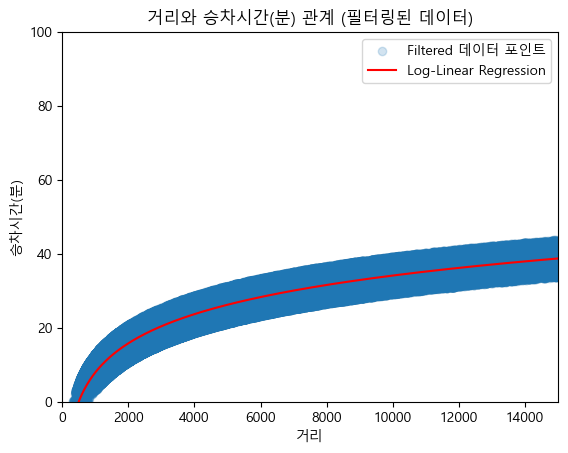

In [137]:
# 예측값 계산
data['예측_승차시간(분)'] = slope * np.log(data['거리'] + 1) + intercept

# 실제값과 예측값의 차이 계산
data['오차'] = data['승차시간(분)'] - data['예측_승차시간(분)']

# 오차가 ±25 범위 안에 있는 데이터 필터링
filtered_data = data[(data['오차'] >= -5) & (data['오차'] <= 5)]

# 필터링된 데이터 크기 출력
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")

# 필터링된 데이터로 그래프 그리기
plt.scatter(filtered_data['거리'], filtered_data['승차시간(분)'], alpha=0.2, label='Filtered 데이터 포인트')
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 원래 스케일의 회귀선 추가
plt.plot(np.linspace(1, 15000, 500), original_scale_regression_line, color='red', label='Log-Linear Regression')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계 (필터링된 데이터)')
plt.legend()
plt.show()

In [138]:
# 오차가 ±25 범위 안에 있는 데이터 필터링
data = data[(data['오차'] >= -5) & (data['오차'] <= 5)]

- 목직지역과 출발지역 모두 부산인 곳만 추출

In [18]:
data['목적지역'].unique()

array(['부산광역시 사상구', '경상남도 양산시', '부산광역시 부산진구', '부산광역시 사하구', '부산광역시 금정구',
       '부산광역시 북구', '부산광역시 기장군', '부산광역시 동래구', '부산광역시 연제구', '부산광역시 중구',
       '부산광역시 동구', '부산광역시 서구', '부산광역시 강서구', '부산광역시 남구', '경상남도 김해시',
       '부산광역시 영도구', '부산광역시 해운대구', '부산 동래구', '부산 기장군', '부산광역시 수영구',
       '부산 사상구', '부산 남구', '부산 북구', '부산 사하구', '부산 부산진구', '부산 연제구',
       '부산 해운대구', '경남 양산시', '경상남도 창원시', '부산 영도구', '부산 수영구', '경남 김해시',
       '부산 강서구', '부산 서구', '부산 중구', '부산 동구', '부산 금정구', '부산광역시', '경상남도 창녕군',
       '경상남도 거제시', '경상북도 청도군', '경상남도 밀양시', '경상북도 경주시', '경상남도 산청군',
       '울산광역시 남구', '경상남도 통영시', '경상남도 함양군', '울산광역시 중구', '경상남도 남해군',
       '강원도 속초시', '경상남도 하동군', '충청북도 청주시', '경기도 남양주시', '전라남도 목포시'],
      dtype=object)

In [19]:
import pandas as pd

# '부산광역시'를 '부산'으로 변경
data["출발지역"] = data["출발지역"].str.replace("부산광역시", "부산")
data["목적지역"] = data["목적지역"].str.replace("부산광역시", "부산")

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_3136\848100771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["출발지역"] = data["출발지역"].str.replace("부산광역시", "부산")
C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_3136\848100771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["목적지역"] = data["목적지역"].str.replace("부산광역시", "부산")


In [20]:
data['목적지역'].unique()

array(['부산 사상구', '경상남도 양산시', '부산 부산진구', '부산 사하구', '부산 금정구', '부산 북구',
       '부산 기장군', '부산 동래구', '부산 연제구', '부산 중구', '부산 동구', '부산 서구', '부산 강서구',
       '부산 남구', '경상남도 김해시', '부산 영도구', '부산 해운대구', '부산 수영구', '경남 양산시',
       '경상남도 창원시', '경남 김해시', '부산', '경상남도 창녕군', '경상남도 거제시', '경상북도 청도군',
       '경상남도 밀양시', '경상북도 경주시', '경상남도 산청군', '울산광역시 남구', '경상남도 통영시',
       '경상남도 함양군', '울산광역시 중구', '경상남도 남해군', '강원도 속초시', '경상남도 하동군',
       '충청북도 청주시', '경기도 남양주시', '전라남도 목포시'], dtype=object)

In [21]:
data['출발지역'].unique()

array(['부산 사상구', '부산 해운대구', '부산 연제구', '부산 부산진구', '부산 북구', '부산 동래구',
       '부산 수영구', '부산 기장군', '부산 사하구', '부산 금정구', '부산 남구', '부산 서구', '부산 영도구',
       '부산 중구', '부산 강서구', '부산 동구', '경남 양산시', '경상남도 양산시', '부산', '경상남도 김해시',
       '경상남도 창원시', '충청북도 청주시'], dtype=object)

In [22]:
# 출발지역과 목적지역이 모두 '부산'인 데이터만 필터링
filtered_df = data[(data["출발지역"].str.startswith("부산")) & (data["목적지역"].str.startswith("부산"))]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일,거리
12,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,11.036767,30.308283,41.345050,17.383333,3210.950152,False,True,5,2,2849.793852
15,2020-01-01 05:32:39.097,1,부산 연제구,부산 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,2.089550,16.842167,18.931717,10.366667,359.389316,False,True,5,2,4236.207030
18,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,61.793600,20.999283,82.792883,35.283333,5120.670073,False,True,5,2,13430.378438
19,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,35.235833,16.442283,51.678117,35.316667,16660.328522,False,True,6,2,13395.157371
20,2020-01-01 06:33:43.930,1,부산 북구,부산 부산진구,494108,290599,498091,287066,2020-01-01 06:53:16.720,2020-01-01 07:07:33,...,19.546500,14.271333,33.817833,16.150000,7362.768264,False,True,6,2,5324.131666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6,6669.457624
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6,5792.689617
654871,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6,19692.733787
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6,934.400342


In [23]:
data = filtered_df

- 성능을 높이기 위해 구간화

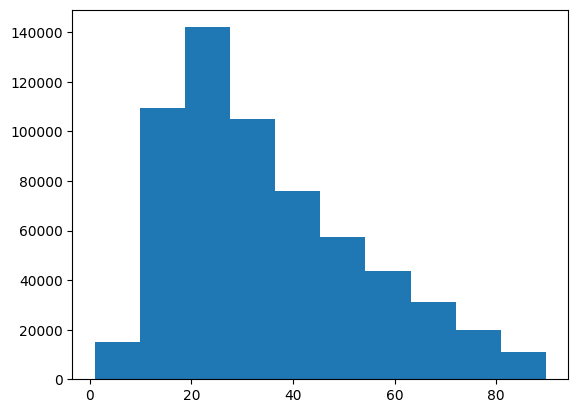

In [25]:
import matplotlib.pyplot as plt

plt.hist(data['총대기시간(분)'])
plt.show()

In [26]:
# 폰트 설정
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 

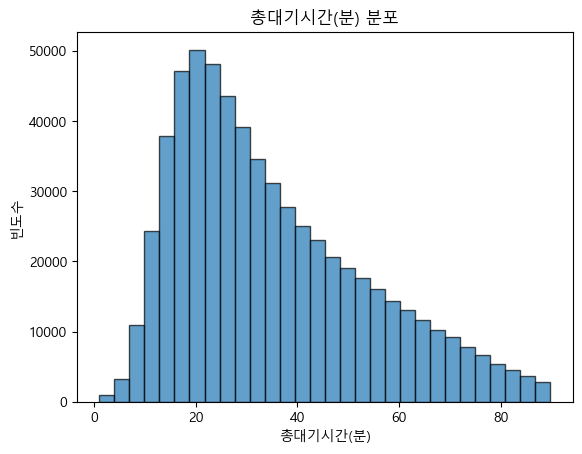

In [27]:
# '총대기시간(분)' 분포 확인
plt.hist(data['총대기시간(분)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('총대기시간(분)')
plt.ylabel('빈도수')
plt.title('총대기시간(분) 분포')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27480ab9570>,
 'caps': [<matplotlib.lines.Line2D at 0x27480ab9ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27480ab92d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27480aba020>],
 'fliers': [<matplotlib.lines.Line2D at 0x27480aba2c0>],
 'means': []}

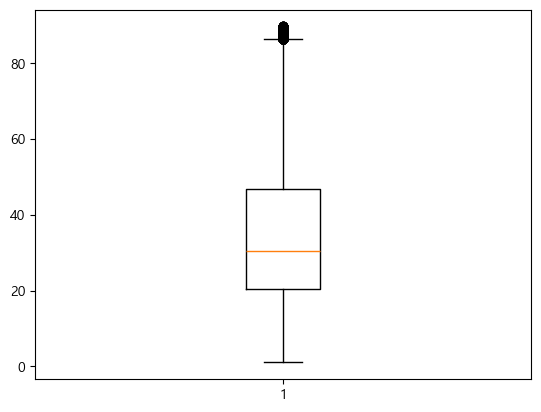

In [28]:
fig, ax = plt.subplots()
ax.boxplot(data['총대기시간(분)'])

In [35]:
max(data['총대기시간(분)'])

89.7715

In [36]:
min(data['총대기시간(분)'])

1.0084999999999997

In [32]:
import pandas as pd

# 분위수를 기준으로 4개 구간으로 나누기 (25%, 50%, 75%)
data['대기시간_구간'] = pd.qcut(data['총대기시간(분)'], q=4, labels=['매우 짧음', '짧음', '보통', '김'])

In [60]:
# 분위수 확인
quantiles = pd.qcut(data['총대기시간(분)'], q=4).unique()
print("분위수 구간:")
print(quantiles)

분위수 구간:
[(30.546, 46.835], (1.0070000000000001, 20.403], (46.835, 89.772], (20.403, 30.546]]
Categories (4, interval[float64, right]): [(1.0070000000000001, 20.403] < (20.403, 30.546] < (30.546, 46.835] < (46.835, 89.772]]


In [59]:
# '대기시간_구간' 컬럼이 존재하는지 확인
if '대기시간_구간' in data.columns:
    # 각 레이블의 비율 계산
    label_counts = data['대기시간_구간'].value_counts(normalize=True)
    print("대기시간_구간의 정답 레이블 비율:")
    print(label_counts)
else:
    print("'대기시간_구간' 컬럼이 존재하지 않습니다.")


대기시간_구간의 정답 레이블 비율:
대기시간_구간
매우 짧음    0.250003
보통       0.250000
김        0.250000
짧음       0.249998
Name: proportion, dtype: float64


구간 3

In [31]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일', '거리', '대기시간_구간'],
      dtype='object')

In [24]:
import numpy as np

# 분위수 계산
q1 = np.percentile(data['총대기시간(분)'], 33)
q2 = np.percentile(data['총대기시간(분)'], 66)

# 구간화
data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=[0, q1, q2, data['총대기시간(분)'].max()], 
                         labels=['짧음', '보통', '김'])

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_3136\3927476573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=[0, q1, q2, data['총대기시간(분)'].max()],


In [34]:
print(f"🔹 구간 경계값: Q1 = {q1:.2f}, Q2 = {q2:.2f}")

🔹 구간 경계값: Q1 = 23.33, Q2 = 39.88


In [25]:
# '대기시간_구간' 컬럼이 존재하는지 확인
if '대기시간_구간' in data.columns:
    # 각 레이블의 비율 계산
    label_counts = data['대기시간_구간'].value_counts(normalize=True)
    print("대기시간_구간의 정답 레이블 비율:")
    print(label_counts)
else:
    print("'대기시간_구간' 컬럼이 존재하지 않습니다.")

대기시간_구간의 정답 레이블 비율:
대기시간_구간
김     0.339999
보통    0.330001
짧음    0.330000
Name: proportion, dtype: float64


### 불필요한 열 제거

In [35]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일', '거리', '대기시간_구간'],
      dtype='object')

In [36]:
data=data.drop(['배차일시', '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '승차시간(분)', '직선거리(km)'],axis=1)

In [37]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,거리,대기시간_구간
12,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,41.345050,False,True,5,2,2849.793852,김
15,2020-01-01 05:32:39.097,1,부산 연제구,부산 부산진구,498495,288086,495760,284851,18.931717,False,True,5,2,4236.207030,짧음
18,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,82.792883,False,True,5,2,13430.378438,김
19,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,51.678117,False,True,6,2,13395.157371,김
20,2020-01-01 06:33:43.930,1,부산 북구,부산 부산진구,494108,290599,498091,287066,33.817833,False,True,6,2,5324.131666,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,41.235333,True,False,21,6,6669.457624,김
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,49.372783,True,False,21,6,5792.689617,김
654871,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,48.949617,True,False,21,6,19692.733787,김
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,84.516000,True,False,21,6,934.400342,김


### SHAP를 위한 간단 인코딩

In [42]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터 준비
data_encoded = data.copy()  # data 변수를 사용

# 접수일시에서 초와 년도 제거
data_encoded['접수일시'] = data_encoded['접수일시'].dt.strftime('%m-%d %H:%M')

# 주말과 공휴일을 숫자로 변환 (True: 1, False: 0)
data_encoded['주말'] = data_encoded['주말'].astype(int)
data_encoded['공휴일'] = data_encoded['공휴일'].astype(int)

# 범주형 변수 레이블 인코딩
label_encoders = {}
categorical_columns = ['출발지역', '목적지역', '접수일시', '대기시간_구간']  # 범주형 변수 목록

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

원핫 인코딩

In [38]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 준비
data_encoded = data.copy()  # data 변수를 사용

# 접수일시에서 초와 년도 제거
data_encoded['접수일시'] = data['접수일시'].dt.strftime('%m-%d %H:%M')

# 주말과 공휴일을 숫자로 변환 (True: 1, False: 0)
data_encoded['주말'] = data_encoded['주말'].astype(int)
data_encoded['공휴일'] = data_encoded['공휴일'].astype(int)

# 범주형 변수 목록
categorical_columns = ['출발지역', '목적지역', '대기시간_구간']

# 원-핫 인코딩 적용
data_encoded = pd.get_dummies(data_encoded, columns=categorical_columns)

# 결과 확인
data_encoded.head()

,접수일시,월,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,...,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구,대기시간_구간_짧음,대기시간_구간_보통,대기시간_구간_김
12,01-01 05:06,1,489507,285817,491872,284227,41.345050,0,1,5,...,False,False,False,False,False,False,False,False,False,True
15,01-01 05:32,1,498495,288086,495760,284851,18.931717,0,1,5,...,False,False,False,False,False,False,False,True,False,False
18,01-01 05:57,1,498923,286584,487815,279035,82.792883,0,1,5,...,True,False,False,False,False,False,False,False,False,True
19,01-01 06:21,1,493723,285383,499594,297423,51.678117,0,1,6,...,False,False,False,False,False,False,False,False,False,True
20,01-01 06:33,1,494108,290599,498091,287066,33.817833,0,1,6,...,False,False,False,False,False,False,False,False,True,False


22

In [39]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 준비
data_encoded = data.copy()  # data 변수를 사용

# 접수일시에서 초와 년도 제거
data_encoded['접수일시'] = data['접수일시'].dt.strftime('%m-%d %H:%M')

# 주말과 공휴일을 숫자로 변환 (True: 1, False: 0)
data_encoded['주말'] = data_encoded['주말'].astype(int)
data_encoded['공휴일'] = data_encoded['공휴일'].astype(int)

# 범주형 변수 목록
categorical_columns = ['출발지역', '목적지역']

# 원-핫 인코딩 적용
data_encoded = pd.get_dummies(data_encoded, columns=categorical_columns)

In [40]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 레이블 인코딩
label_encoders = {}
categorical_columns = ['대기시간_구간']  # 범주형 변수 목록

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# 결과 확인
data_encoded.head()

,접수일시,월,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,...,목적지역_부산 부산진구,목적지역_부산 북구,목적지역_부산 사상구,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구
12,01-01 05:06,1,489507,285817,491872,284227,41.345050,0,1,5,...,False,False,True,False,False,False,False,False,False,False
15,01-01 05:32,1,498495,288086,495760,284851,18.931717,0,1,5,...,True,False,False,False,False,False,False,False,False,False
18,01-01 05:57,1,498923,286584,487815,279035,82.792883,0,1,5,...,False,False,False,True,False,False,False,False,False,False
19,01-01 06:21,1,493723,285383,499594,297423,51.678117,0,1,6,...,False,False,False,False,False,False,False,False,False,False
20,01-01 06:33,1,494108,290599,498091,287066,33.817833,0,1,6,...,True,False,False,False,False,False,False,False,False,False


In [41]:
data_encoded=data_encoded.drop(['접수일시'],axis=1)
data_encoded

,월,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,...,목적지역_부산 부산진구,목적지역_부산 북구,목적지역_부산 사상구,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구
12,1,489507,285817,491872,284227,41.345050,0,1,5,2,...,False,False,True,False,False,False,False,False,False,False
15,1,498495,288086,495760,284851,18.931717,0,1,5,2,...,True,False,False,False,False,False,False,False,False,False
18,1,498923,286584,487815,279035,82.792883,0,1,5,2,...,False,False,False,True,False,False,False,False,False,False
19,1,493723,285383,499594,297423,51.678117,0,1,6,2,...,False,False,False,False,False,False,False,False,False,False
20,1,494108,290599,498091,287066,33.817833,0,1,6,2,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,7,501300,288679,507568,286400,41.235333,1,0,21,6,...,False,False,False,False,False,False,False,False,False,True
654870,7,506206,292715,509093,287693,49.372783,1,0,21,6,...,False,False,False,False,False,False,False,False,False,True
654871,7,506180,285160,506010,304852,48.949617,1,0,21,6,...,False,False,False,False,False,False,False,False,False,False
654872,7,502745,286538,501997,285978,84.516000,1,0,21,6,...,False,False,False,False,False,True,False,False,False,False


### X,Y 변수 분리

In [42]:
data_encoded.columns

Index(['월', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '총대기시간(분)', '주말', '공휴일',
       '접수시간', '요일', '거리', '대기시간_구간', '출발지역_부산', '출발지역_부산 강서구', '출발지역_부산 금정구',
       '출발지역_부산 기장군', '출발지역_부산 남구', '출발지역_부산 동구', '출발지역_부산 동래구',
       '출발지역_부산 부산진구', '출발지역_부산 북구', '출발지역_부산 사상구', '출발지역_부산 사하구',
       '출발지역_부산 서구', '출발지역_부산 수영구', '출발지역_부산 연제구', '출발지역_부산 영도구', '출발지역_부산 중구',
       '출발지역_부산 해운대구', '목적지역_부산', '목적지역_부산 강서구', '목적지역_부산 금정구', '목적지역_부산 기장군',
       '목적지역_부산 남구', '목적지역_부산 동구', '목적지역_부산 동래구', '목적지역_부산 부산진구', '목적지역_부산 북구',
       '목적지역_부산 사상구', '목적지역_부산 사하구', '목적지역_부산 서구', '목적지역_부산 수영구',
       '목적지역_부산 연제구', '목적지역_부산 영도구', '목적지역_부산 중구', '목적지역_부산 해운대구'],
      dtype='object')

In [43]:
# X 변수와 Y 변수 분리
Y = data_encoded['대기시간_구간']
data_encoded = data_encoded.drop(columns=['총대기시간(분)', '대기시간_구간'])

In [45]:
Y

12        2
15        1
18        0
19        0
20        2
         ..
654869    2
654870    0
654871    0
654872    0
654873    3
Name: 대기시간_구간, Length: 610325, dtype: int32

### 변수 스케일링

- 이상치 많은지 확인 => 많다면 Robustscaler 사용!
- => 결과 : 이상치 많았음 (아래 참고)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# 데이터 프레임에서 수치형 데이터 추출
numerical_data = data.select_dtypes(include=[np.number])

# 이상치 개수 확인
outlier_counts = {}
for column in numerical_data.columns:
    q1 = numerical_data[column].quantile(0.25)
    q3 = numerical_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = numerical_data[(numerical_data[column] < lower_bound) | (numerical_data[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# 이상치 개수 출력
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier Count'])
outlier_counts_df

,Variable,Outlier Count
0,월,0
1,호출지경도,6266
2,호출지위도,7616
3,목적지경도,6303
4,목적지위도,7052
5,총대기시간(분),3234
6,접수시간,5734
7,요일,0
8,거리,23298


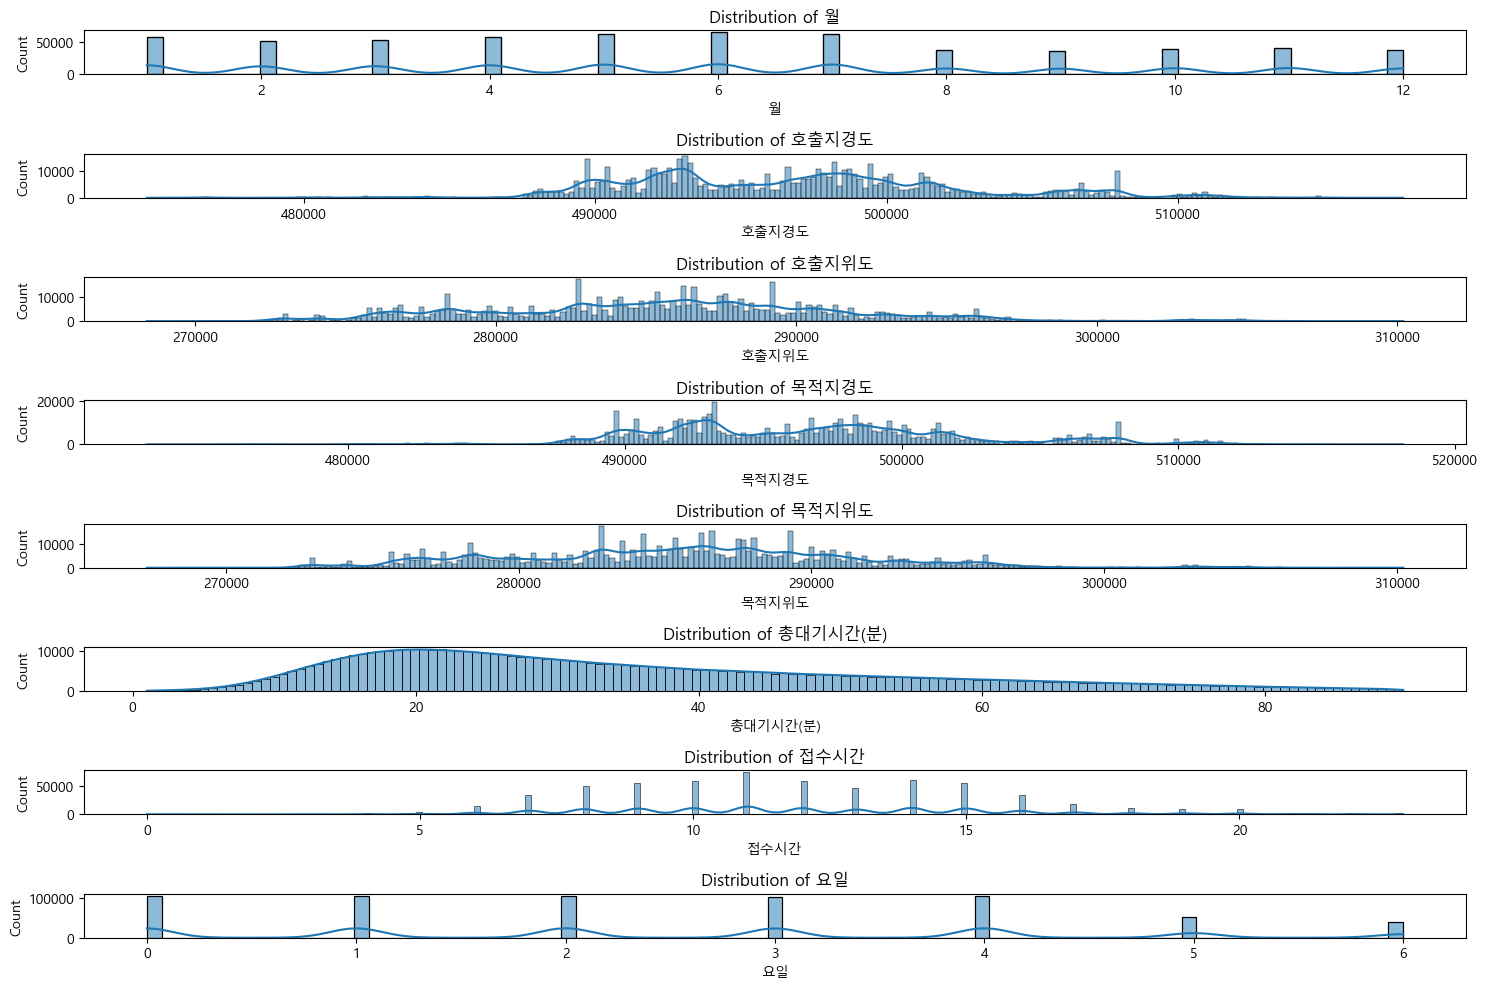

In [48]:
# 정규분포 시각화
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_data.columns):
    plt.subplot(len(numerical_data.columns), 1, i + 1)
    sns.histplot(numerical_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

1) 월:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

2) 호출지경도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

3) 호출지위도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

4) 목적지경도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

5) 목적지위도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

6) 총대기시간(분):
데이터가 한쪽으로 치우친 분포를 보이고 있습니다. 일부 극단적인 값이 존재하여 이상치가 있을 가능성이 있습니다.

7) 접수시간:
데이터가 주기적인 분포를 보이고 있습니다. 이상치가 거의 없을 가능성이 큽니다.

8) 요일:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

9) 대기시간:
데이터가 한쪽으로 치우친 분포를 보이고 있으며, 일부 극단적인 값이 존재하여 이상치가 있을 가능성이 있습니다.

10) 접수일시_년초제거_코드:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

- 방법 1. RobustScaler

In [47]:
from sklearn.preprocessing import RobustScaler

# 스케일링할 컬럼 선택 (이진 인코딩 및 원-핫 인코딩된 컬럼을 제외한 나머지)
columns_to_scale = data_encoded.select_dtypes(include=[np.number]).columns

# RobustScaler 적용
scaler = RobustScaler()
data_scaled = data_encoded.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

In [48]:
data_scaled

,월,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일,거리,...,목적지역_부산 부산진구,목적지역_부산 북구,목적지역_부산 사상구,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구
12,-0.833333,-0.954098,0.000811,-0.643373,-0.192837,0.0,1.0,-1.4,0.000000,-0.261213,...,False,False,True,False,False,False,False,False,False,False
15,-0.833333,0.241751,0.307391,-0.122892,-0.110980,0.0,1.0,-1.4,0.000000,-0.017643,...,True,False,False,False,False,False,False,False,False,False
18,-0.833333,0.298696,0.104445,-1.186479,-0.873934,0.0,1.0,-1.4,0.000000,1.597625,...,False,False,False,True,False,False,False,False,False,False
19,-0.833333,-0.393161,-0.057830,0.390361,1.538240,0.0,1.0,-1.2,0.000000,1.591437,...,False,False,False,False,False,False,False,False,False,False
20,-0.833333,-0.341937,0.646940,0.189157,0.179588,0.0,1.0,-1.2,0.000000,0.173488,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,0.166667,0.614955,0.387515,1.457831,0.092221,1.0,0.0,1.8,1.333333,0.409840,...,False,False,False,False,False,False,False,False,False,True
654870,0.166667,1.267696,0.932847,1.661981,0.261839,1.0,0.0,1.8,1.333333,0.255806,...,False,False,False,False,False,False,False,False,False,True
654871,0.166667,1.264236,-0.087961,1.249264,2.512790,1.0,0.0,1.8,1.333333,2.697819,...,False,False,False,False,False,False,False,False,False,False
654872,0.166667,0.807211,0.098230,0.712048,0.036862,1.0,0.0,1.8,1.333333,-0.597717,...,False,False,False,False,False,True,False,False,False,False


In [49]:
# 스케일링된 데이터프레임을 엑셀 파일로 저장
#data_scaled.to_excel('final_prepro_scaled_두리발_data.xlsx', index=False)

- 방법2. Box-Cox 변환(정규화) 후 StandardScaler(표준화)

- 정규 분포 따르는지 확인 => 따른다면 standard scaler 사용!
- 결과 : 정규분포 따르지 않음(아래 결과값 참고. p-value가 0.05보다 작으면, 해당 변수는 정규분포를 따르지 않음) => Box-Cox 변환(정규화) 후 StandardScaler(표준화)

In [50]:
# # 정규분포 검정 (Shapiro-Wilk test)
# shapiro_results = numerical_data.apply(lambda x: shapiro(x.dropna()) if x.dtype != 'O' else None)

# # Shapiro-Wilk test 결과 출력
# shapiro_results_summary = shapiro_results.apply(lambda x: {'Statistic': x[0], 'p-value': x[1]} if x is not None else None)
# shapiro_results_summary = pd.DataFrame(shapiro_results_summary.tolist(), index=numerical_data.columns)

# shapiro_results_summary

In [51]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import probplot

# # 정규분포 시각화를 위한 Q-Q 플롯 및 히스토그램
# plt.figure(figsize=(15, 20))

# for i, column in enumerate(numerical_data.columns):
#     plt.subplot(len(numerical_data.columns), 2, 2 * i + 1)
#     sns.histplot(numerical_data[column], kde=True)
#     plt.title(f'Histogram and KDE of {column}')
    
#     plt.subplot(len(numerical_data.columns), 2, 2 * i + 2)
#     probplot(numerical_data[column].dropna(), dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot of {column}')

# plt.tight_layout()
# plt.show()

- Box-Cox 변환(정규화) 후 StandardScaler(표준화)
1) Box-Cox 변환(정규화)

In [52]:
# import pandas as pd
# import numpy as np
# from scipy.stats import boxcox
# from sklearn.preprocessing import StandardScaler

# # Box-Cox 변환을 위한 함수
# def boxcox_transform(data):
#     # 데이터가 양수인지 확인
#     if np.any(data <= 0):
#         data = data - np.min(data) + 1
#     return boxcox(data)[0]

# # 수치형 변수를 선택
# numerical_features = data_encoded.select_dtypes(include=[np.number])

# # Box-Cox 변환 적용
# numerical_features_transformed = numerical_features.copy()
# for column in numerical_features.columns:
#     try:
#         numerical_features_transformed[column] = boxcox_transform(numerical_features[column])
#     except Exception as e:
#         print(f"Box-Cox 변환 중 오류 발생: {column}, 오류 메시지: {e}")

2) StandardScaler(표준화)

In [53]:
# # 변환된 수치형 변수와 나머지 변수를 결합
# data_transformed = data_encoded.copy()
# data_transformed[numerical_features.columns] = numerical_features_transformed

# # StandardScaler 적용
# scaler = StandardScaler()
# data_scaled2 = data_transformed.copy()
# data_scaled2[numerical_features.columns] = scaler.fit_transform(data_transformed[numerical_features.columns])

# # 결과 확인
# print(data_scaled2.head())

In [54]:
# data_scaled2

In [55]:
# data_scaled2.to_excel('final2_prepro_scaled_두리발_data.xlsx', index=False)

3. minmax

In [71]:
from sklearn.preprocessing import MinMaxScaler

# 제외할 컬럼 리스트
exclude_columns = ['월', '요일', '접수시간'] + list(data_encoded.select_dtypes(include=['uint8']).columns)

# MinMaxScaler 적용할 컬럼 선택
columns_to_scale = [col for col in data_encoded.select_dtypes(include=[np.number]).columns if col not in exclude_columns]

# MinMaxScaler 적용
scaler = MinMaxScaler()
data_scaled = data_encoded.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# 결과 확인
data_scaled.head()

,월,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일,거리,...,목적지역_부산 부산진구,목적지역_부산 북구,목적지역_부산 사상구,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구
12,1,0.345437,0.416703,0.421554,0.394368,0.0,1.0,5,2,0.059630,...,False,False,True,False,False,False,False,False,False,False
15,1,0.553840,0.470982,0.507240,0.408914,0.0,1.0,5,2,0.088639,...,True,False,False,False,False,False,False,False,False,False
18,1,0.563764,0.435051,0.332143,0.273340,0.0,1.0,5,2,0.281021,...,False,False,False,True,False,False,False,False,False,False
19,1,0.443192,0.406320,0.591736,0.701974,0.0,1.0,6,2,0.280284,...,False,False,False,False,False,False,False,False,False,False
20,1,0.452119,0.531099,0.558612,0.460547,0.0,1.0,6,2,0.111403,...,True,False,False,False,False,False,False,False,False,False


In [54]:
data[['출발지역', '호출지경도']].sort_values(by='호출지경도').head(30)

,출발지역,호출지경도
268453,부산 강서구,474609
235092,부산 강서구,474610
411041,부산 강서구,474610
181704,부산 강서구,474627
561619,부산 강서구,474628
286225,부산 강서구,475195
528297,부산 강서구,475268
310392,부산 강서구,475268
479089,부산 강서구,475268
417825,부산 강서구,475268


In [58]:
data[['출발지역', '호출지위도']].sort_values(by='호출지위도').head(30)

,출발지역,호출지위도
52420,부산 강서구,268398
52421,부산 강서구,268436
411102,부산 강서구,268462
245169,부산 강서구,268478
463811,부산 강서구,268479
573551,부산 강서구,268646
74513,부산 강서구,268822
600533,부산 강서구,268872
181704,부산 강서구,270218
561619,부산 강서구,270220


In [55]:
data[['출발지역', '호출지경도']].sort_values(by='호출지경도', ascending=False).head(30)

,출발지역,호출지경도
626823,부산 기장군,517737
29996,부산 기장군,517151
228537,부산 기장군,517076
39155,부산 기장군,517050
12315,부산 기장군,517050
81814,부산 기장군,516944
231026,부산 기장군,516874
278733,부산 기장군,516874
273522,부산 기장군,516821
256872,부산 기장군,516821


In [57]:
data[['출발지역', '호출지위도']].sort_values(by='호출지위도', ascending=False).head(30)

,출발지역,호출지위도
105703,부산 기장군,310200
350569,부산 기장군,310200
119424,부산 기장군,310200
181643,부산 기장군,310200
361923,부산 기장군,310200
207023,부산 기장군,310200
154723,부산 기장군,310200
334419,부산 기장군,310200
402174,부산 기장군,310200
42393,부산 기장군,310200


In [66]:
data[['목적지역', '목적지경도']].sort_values(by='목적지경도').head(30)

,목적지역,목적지경도
49910,부산,472744
524845,부산 강서구,474553
268194,부산 강서구,474609
410715,부산 강서구,474610
234903,부산 강서구,474610
181648,부산 강서구,474627
560857,부산 강서구,474628
546607,부산 강서구,474628
500246,부산 강서구,475268
152520,부산 강서구,475268


In [67]:
data[['목적지역', '목적지위도']].sort_values(by='목적지위도').head(30)

,목적지역,목적지위도
573339,부산 강서구,267309
52370,부산 강서구,268398
52352,부산 강서구,268436
411041,부산 강서구,268462
245147,부산 강서구,268478
522794,부산 강서구,268486
67988,부산 강서구,268516
378165,부산 강서구,268532
588730,부산 강서구,268872
49910,부산,269248


In [68]:
data[['목적지역', '목적지경도']].sort_values(by='목적지경도', ascending=False).head(30)

,목적지역,목적지경도
67331,부산 기장군,518119
626710,부산 기장군,517737
346682,부산 기장군,517737
29807,부산 기장군,517178
42393,부산 기장군,517050
278864,부산 기장군,516874
231160,부산 기장군,516874
351024,부산 기장군,516855
360540,부산 기장군,516854
232607,부산 기장군,516821


In [69]:
data[['목적지역', '목적지위도']].sort_values(by='목적지위도', ascending=False).head(30)

,목적지역,목적지위도
137924,부산 기장군,310208
54747,부산 기장군,310200
252520,부산 기장군,310200
343687,부산 기장군,310200
132330,부산 기장군,310200
220533,부산 기장군,310200
123602,부산 기장군,310200
221203,부산 기장군,310200
181989,부산 기장군,310200
408321,부산 기장군,310200


### VIF 계산하여 다중공선성 제거

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# VIF 계산 및 출력
vif = calculate_vif(data_scaled)
print("VIF before removing features:")
print(vif)

# VIF가 10을 초과하는 변수 제거
while vif["VIF"].max() > 10:
    highest_vif_feature = vif.sort_values("VIF", ascending=False)["Feature"].iloc[0]
    print(f"Removing feature with highest VIF: {highest_vif_feature}")
    data_scaled_2 = data_scaled.drop(columns=[highest_vif_feature])
    vif = calculate_vif(data_scaled_2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [72]:
data_scaled = data_scaled.drop(columns=['접수일시'])

KeyError: "['접수일시'] not found in axis"

In [73]:
data_scaled

,월,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일,거리,...,목적지역_부산 부산진구,목적지역_부산 북구,목적지역_부산 사상구,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구
12,1,0.345437,0.416703,0.421554,0.394368,0.0,1.0,5,2,0.059630,...,False,False,True,False,False,False,False,False,False,False
15,1,0.553840,0.470982,0.507240,0.408914,0.0,1.0,5,2,0.088639,...,True,False,False,False,False,False,False,False,False,False
18,1,0.563764,0.435051,0.332143,0.273340,0.0,1.0,5,2,0.281021,...,False,False,False,True,False,False,False,False,False,False
19,1,0.443192,0.406320,0.591736,0.701974,0.0,1.0,6,2,0.280284,...,False,False,False,False,False,False,False,False,False,False
20,1,0.452119,0.531099,0.558612,0.460547,0.0,1.0,6,2,0.111403,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,7,0.618879,0.485168,0.767471,0.445022,1.0,0.0,21,6,0.139553,...,False,False,False,False,False,False,False,False,False,True
654870,7,0.732633,0.581719,0.801080,0.475163,1.0,0.0,21,6,0.121208,...,False,False,False,False,False,False,False,False,False,True
654871,7,0.732030,0.400986,0.733135,0.875149,1.0,0.0,21,6,0.412056,...,False,False,False,False,False,False,False,False,False,False
654872,7,0.652384,0.433951,0.644694,0.435185,1.0,0.0,21,6,0.019552,...,False,False,False,False,False,True,False,False,False,False


### 피처 셀렉션 - SHAP(SHapley Additive exPlanations)

In [54]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import time
from joblib import Parallel, delayed

In [55]:
# 데이터프레임이 숫자형 데이터로만 구성되어 있는지 확인 및 원-핫 인코딩
X_encoded = pd.get_dummies(data_scaled, drop_first=True)

# 모든 피처가 숫자형 데이터인지 확인
print(X_encoded.dtypes)
if not X_encoded.select_dtypes(include=[object]).empty:
    raise ValueError("데이터셋에 여전히 숫자가 아닌 열이 있습니다.")

월        float64
출발지역     float64
목적지역     float64
호출지경도    float64
호출지위도    float64
목적지경도    float64
목적지위도    float64
주말       float64
공휴일      float64
접수시간     float64
요일       float64
dtype: object


In [56]:
X_encoded

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
12,-0.833333,0.000000,0.000000,-0.954098,0.000811,-0.643373,-0.192837,0.0,1.0,-1.4,0.000000
15,-0.833333,0.666667,-0.333333,0.241751,0.307391,-0.122892,-0.110980,0.0,1.0,-1.4,0.000000
18,-0.833333,0.666667,0.166667,0.298696,0.104445,-1.186479,-0.873934,0.0,1.0,-1.4,0.000000
19,-0.833333,-0.333333,-1.166667,-0.393161,-0.057830,0.390361,1.538240,0.0,1.0,-1.2,0.000000
20,-0.833333,-0.166667,-0.333333,-0.341937,0.646940,0.189157,0.179588,0.0,1.0,-1.2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
654869,0.166667,-0.500000,1.166667,0.614955,0.387515,1.457831,0.092221,1.0,0.0,1.8,1.333333
654870,0.166667,1.166667,1.166667,1.267696,0.932847,1.661981,0.261839,1.0,0.0,1.8,1.333333
654871,0.166667,1.166667,-1.000000,1.264236,-0.087961,1.249264,2.512790,1.0,0.0,1.8,1.333333
654872,0.166667,1.166667,0.500000,0.807211,0.098230,0.712048,0.036862,1.0,0.0,1.8,1.333333


In [57]:
from sklearn.ensemble import RandomForestClassifier

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

: 

In [1]:
# SHAP 설명자 초기화
explainer = shap.TreeExplainer(model)

# 테스트 세트의 샘플로 SHAP 값 계산
X_sample = X_test.sample(n=100, random_state=42)

NameError: name 'shap' is not defined

In [71]:
# 병렬로 SHAP 값 계산
def calculate_shap_value(row):
    return explainer.shap_values(row)

shap_values = Parallel(n_jobs=-1)(delayed(calculate_shap_value)(row) for _, row in X_sample.iterrows())

In [72]:
# SHAP 값을 배열 형식으로 변환
shap_values = np.array(shap_values)

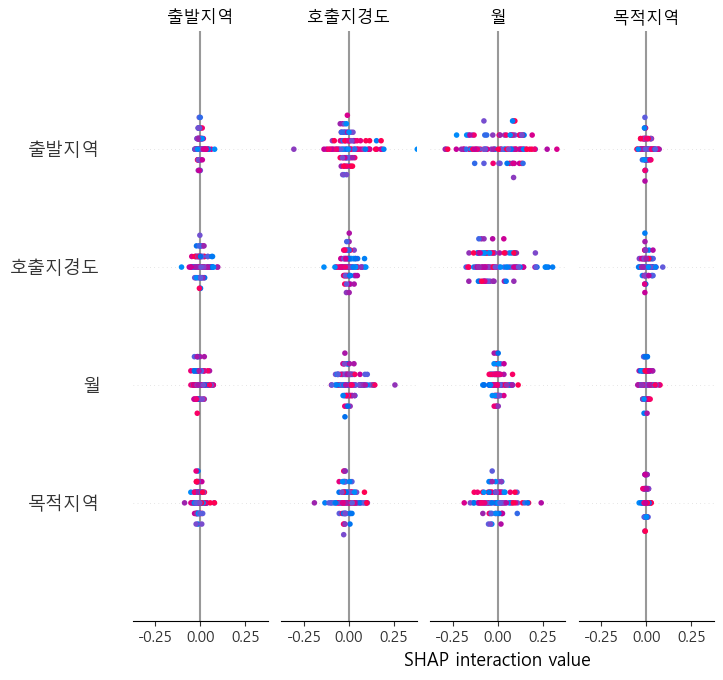

In [73]:
# SHAP 값의 요약 그래프
shap.summary_plot(shap_values, X_sample, plot_type="bar")

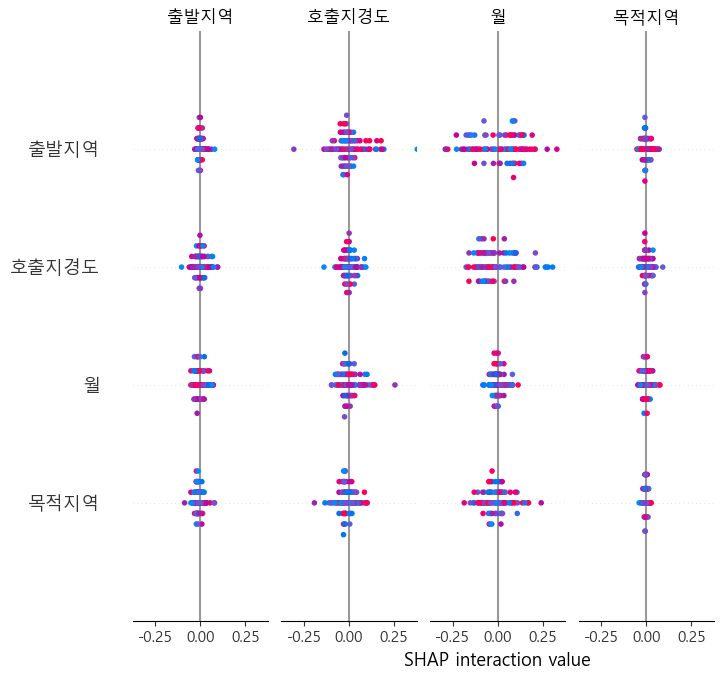

In [74]:
# 상세 SHAP 요약 그래프
shap.summary_plot(shap_values, X_sample)

In [75]:
# SHAP 값을 배열 형식으로 변환
shap_values = np.array(shap_values)
# 클래스별로 SHAP 값을 합산하여 평균 절대 SHAP 값 계산
mean_abs_shap_values = np.mean(np.abs(shap_values).sum(axis=0), axis=0)

In [76]:
# 각 피처에 대한 평균 절대 SHAP 값 계산
shap_importance = pd.DataFrame(list(zip(X_sample.columns, mean_abs_shap_values)), columns=['Feature', 'SHAP Importance'])
shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False)

In [77]:
# 결과 출력
print(shap_importance.head(5))

  Feature  SHAP Importance
1    출발지역         2.891216
3   호출지경도         2.573813
0       월         1.819645
2    목적지역         1.737309


In [78]:
# 상위 피처 선택(중복 제거)
top_features = shap_importance['Feature'].drop_duplicates().head(9).values
print("SHAP 값 기반 상위 피처: ", top_features)

SHAP 값 기반 상위 피처:  ['출발지역' '호출지경도' '월' '목적지역']


In [79]:
# 선택된 피처로 최종 데이터셋 생성
X_selected = X_encoded[top_features]

### 모델 학습 및 평가

In [38]:
# 선택된 피처로 학습 데이터와 테스트 데이터 재생성
X_selected_train = X_train[top_features]
X_selected_test = X_test[top_features]

NameError: name 'X_train' is not defined

In [81]:
# 새로운 모델 초기화 및 학습
selected_model = RandomForestRegressor(n_estimators=100, random_state=42)
selected_model.fit(X_selected_train, Y_train)

RandomForestRegressor(random_state=42)

In [82]:
# 모델 평가
train_score = selected_model.score(X_selected_train, Y_train)
test_score = selected_model.score(X_selected_test, Y_test)

print("Train Score: ", train_score)
print("Test Score: ", test_score)

Train Score:  0.41494874757583455
Test Score:  -0.05238301018068969


- 모델의 학습 점수와 테스트 점수 간의 차이가 상당히 큼
- 모델이 학습 데이터에 과적합(overfitting)되어 테스트 데이터에서의 일반화 성능이 떨어짐

### 7가지 기본 모델 학습 및 평가

### 분류

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X = data_encoded
y = Y

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (필요에 따라)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

: 

In [ ]:
data_scaled

In [74]:
from sklearn.model_selection import train_test_split

# 학습 데이터와 테스트 데이터로 그룹별 비율 유지하며 분할
X_train, X_test, Y_train, Y_test = train_test_split(
    data_scaled, Y, test_size=0.2, random_state=42, stratify=Y
)

print(Y_train.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True))

대기시간_구간
0    0.339999
2    0.330000
1    0.330000
Name: proportion, dtype: float64
대기시간_구간
0    0.339999
1    0.330005
2    0.329996
Name: proportion, dtype: float64


In [49]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled, Y, test_size=0.2, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [76]:
# 모델 초기화
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# 모델 훈련
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, ...)

In [77]:
# 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')
class_report = classification_report(Y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:")
print(class_report)

Accuracy: 0.5341
F1 Score: 0.5224
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62     41502
           1       0.42      0.31      0.36     40282
           2       0.56      0.62      0.59     40281

    accuracy                           0.53    122065
   macro avg       0.52      0.53      0.52    122065
weighted avg       0.52      0.53      0.52    122065



구간 3개

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')
class_report = classification_report(Y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:")
print(class_report)

In [83]:
# 선택된 피처로 학습 데이터와 테스트 데이터 재생성
X_selected_train = X_train[top_features]
X_selected_test = X_test[top_features]

In [67]:
X_selected_train = X_train
X_selected_test = X_test

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    #"k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_selected_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_selected_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_2464\3978830004.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


: 

In [85]:
X_train

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
347653,0.000000,0.285714,-4.000000,-0.506991,-0.925023,-2.162512,0.853793,0.0,0.0,0.2,-0.333333
124740,0.166667,0.285714,0.142857,-0.496784,-0.927098,-1.153043,-1.645438,0.0,0.0,0.2,-0.333333
401535,0.333333,0.000000,-0.285714,-0.713647,-0.247503,-0.031890,-0.265633,0.0,0.0,0.8,0.666667
524725,-0.666667,0.571429,-0.285714,0.277545,0.374757,-0.144409,-0.224628,0.0,0.0,0.2,-0.333333
295209,-0.333333,0.000000,0.000000,-0.769994,0.246984,-0.930372,-0.030497,1.0,0.0,-0.6,1.333333
...,...,...,...,...,...,...,...,...,...,...,...
229208,1.000000,0.714286,0.714286,0.078160,-1.276819,0.196491,-1.294721,0.0,0.0,-0.2,0.666667
486984,1.000000,0.571429,-0.285714,0.277545,0.374757,-0.144409,-0.224628,0.0,0.0,0.4,0.000000
251782,-0.833333,0.714286,0.714286,-0.186381,-1.049552,0.123938,-1.069580,0.0,0.0,0.2,0.000000
279963,-0.500000,-1.000000,-0.428571,0.388003,1.004151,0.469712,0.441056,1.0,0.0,-0.6,1.000000


In [86]:
X_test

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
590362,-0.166667,0.000000,0.000000,-0.755593,0.272409,-0.856009,0.169528,1.0,0.0,-1.0,1.000000
298747,-0.333333,-0.142857,-0.142857,-0.641359,1.141263,-0.343685,0.538186,0.0,0.0,0.6,0.333333
162470,0.500000,-0.142857,0.000000,-0.756991,0.602542,-0.665506,-0.194516,0.0,0.0,0.4,0.000000
339186,0.000000,1.000000,-0.714286,1.394855,0.032430,0.180894,-0.369170,0.0,0.0,0.8,0.333333
459641,0.833333,0.571429,0.571429,0.252657,0.252821,-0.002367,0.294208,0.0,0.0,-0.8,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
266232,-0.666667,0.000000,-0.285714,-0.672399,-0.171099,-0.496867,-0.152358,0.0,0.0,0.6,0.666667
208147,0.833333,0.714286,0.714286,0.173658,-1.136204,0.085086,-1.290748,0.0,0.0,0.6,-0.666667
180004,0.666667,0.428571,-0.285714,0.721616,-0.169802,-0.018521,-0.104177,0.0,0.0,-0.8,0.333333
397248,0.333333,0.714286,0.857143,0.130453,-1.144117,-0.337140,-0.975654,0.0,0.0,-1.6,-0.666667


In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_19368\1011471458.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.332853,0.333845,0.309903,0.314402,0.332853,0.333845,0.283205,0.284112
1,Decision Tree Classifier,0.354972,0.358526,0.358096,0.361514,0.354972,0.358526,0.355961,0.359376
2,Random Forest Classifier,0.389424,0.392936,0.384621,0.387414,0.389424,0.392936,0.386610,0.389611
3,Gradient Boosting Classifier,0.401343,0.404766,0.382207,0.386268,0.401343,0.404766,0.382029,0.385444
4,k-Nearest Neighbors,0.363443,0.367899,0.369439,0.374097,0.363443,0.367899,0.363422,0.367689
5,XGBoost Classifier,0.422006,0.426906,0.404445,0.408760,0.422006,0.426906,0.407000,0.410581


- 구간화2 이후

In [165]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.557807,0.557657,0.417681,0.470650,0.557807,0.557657,0.399618,0.399385
1,Decision Tree Classifier,0.457282,0.459313,0.471664,0.475059,0.457282,0.459313,0.463688,0.466219
2,Random Forest Classifier,0.541592,0.542221,0.496481,0.498935,0.541592,0.542221,0.507164,0.509639
3,Gradient Boosting Classifier,0.573649,0.574088,0.531523,0.578179,0.573649,0.574088,0.463861,0.464170
4,k-Nearest Neighbors,0.504789,0.505155,0.482567,0.484509,0.504789,0.505155,0.490828,0.492179
5,XGBoost Classifier,0.582663,0.584668,0.533344,0.542275,0.582663,0.584668,0.498805,0.500434


- 딥러닝

In [106]:
X_train_deep = X_train.values
X_test_deep = X_test.values
Y_train_deep = Y_train.values
Y_test_deep = Y_test.values

In [108]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 딥러닝 모델 구축 함수
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_deep.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 가정
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 결과를 저장할 리스트
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

# 교차 검증을 통한 학습 및 평가
for train_index, val_index in kf.split(X_train_deep):
    X_train_fold, X_val_fold = X_train_deep[train_index], X_train_deep[val_index]
    Y_train_fold, Y_val_fold = Y_train_deep[train_index], Y_train_deep[val_index]

    model = create_model()
    model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=0)

    Y_val_pred = (model.predict(X_val_fold) > 0.5).astype("int32")
    train_accuracies.append(accuracy_score(Y_val_fold, Y_val_pred))
    train_precisions.append(precision_score(Y_val_fold, Y_val_pred, average='weighted'))
    train_recalls.append(recall_score(Y_val_fold, Y_val_pred, average='weighted'))
    train_f1s.append(f1_score(Y_val_fold, Y_val_pred, average='weighted'))

# 학습 데이터에 대한 평균 점수 계산
train_accuracy = np.mean(train_accuracies)
train_precision = np.mean(train_precisions)
train_recall = np.mean(train_recalls)
train_f1 = np.mean(train_f1s)

# 전체 학습 데이터로 모델 학습
final_model = create_model()
final_model.fit(X_train_deep, Y_train_deep, epochs=50, batch_size=32, verbose=0)

# 테스트 데이터에 대한 평가
Y_test_pred = (final_model.predict(X_test_deep) > 0.5).astype("int32")
test_accuracy = accuracy_score(Y_test_deep, Y_test_pred)
test_precision = precision_score(Y_test_deep, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test_deep, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test_deep, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
result_row = pd.DataFrame([["Deep Learning Model", train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                          columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2201/2201 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Temp\ipykernel_19368\4191387273.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Deep Learning Model,0.250037,0.249858,0.06252,0.062429,0.250037,0.249858,0.100028,0.099898


### 회귀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score]], columns=["Model", "Train Score", "Test Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_12912\2883513281.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Score,Test Score
0,Linear Regression,0.058141,0.056003
1,Ridge Regression,0.058141,0.056003
2,Lasso Regression,0.025105,0.024330
3,ElasticNet Regression,0.026666,0.025933
4,Decision Tree Regression,0.863460,-0.222287
5,Random Forest Regression,0.793208,0.223985
6,Gradient Boosting Regression,0.233822,0.233902


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_12912\805031591.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train R2   Test R2   Train MSE    Test MSE  \
0             Linear Regression  0.058141  0.056003  420.240753  423.737044   
1              Ridge Regression  0.058141  0.056003  420.240753  423.737042   
2              Lasso Regression  0.025105  0.024330  434.980875  437.954352   
3         ElasticNet Regression  0.026666  0.025933  434.284108  437.234848   
4      Decision Tree Regression  0.863460 -0.222287   60.921804  548.654835   
5      Random Forest Regression  0.793208  0.223985   92.266909  348.334067   
6  Gradient Boosting Regression  0.233822  0.233902  341.854912  343.882861   

   Train MAE   Test MAE  
0  15.879993  15.930169  
1  15.879995  15.930171  
2  16.359431  16.405368  
3  16.348701  16.394815  
4   3.489879  16.819524  
5   6.708826  13.730098  
6  14.053951  14.083984  


In [ ]:
results

,Model,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE
0,Linear Regression,0.058141,0.056003,420.240753,423.737044,15.879993,15.930169
1,Ridge Regression,0.058141,0.056003,420.240753,423.737042,15.879995,15.930171
2,Lasso Regression,0.025105,0.024330,434.980875,437.954352,16.359431,16.405368
3,ElasticNet Regression,0.026666,0.025933,434.284108,437.234848,16.348701,16.394815
4,Decision Tree Regression,0.863460,-0.222287,60.921804,548.654835,3.489879,16.819524
5,Random Forest Regression,0.793208,0.223985,92.266909,348.334067,6.708826,13.730098
6,Gradient Boosting Regression,0.233822,0.233902,341.854912,343.882861,14.053951,14.083984


- 과적합 방지 : 교차검증

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_12912\3013380384.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train Score  Test Score  \
0              Ridge Regression     0.058141    0.056003   
1              Lasso Regression     0.057604    0.055504   
2         ElasticNet Regression     0.055027    0.053082   
3      Decision Tree Regression     0.150244    0.149772   
4      Random Forest Regression     0.153937    0.153242   
5  Gradient Boosting Regression     0.273108    0.268118   
6            XGBoost Regression     0.271217    0.268198   

   Cross-Validation Score  
0                0.058105  
1                0.057573  
2                0.054997  
3                0.149674  
4                0.153375  
5                0.266472  
6                0.266384  


In [ ]:
results

,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,0.058105
1,Lasso Regression,0.057604,0.055504,0.057573
2,ElasticNet Regression,0.055027,0.053082,0.054997
3,Decision Tree Regression,0.150244,0.149772,0.149674
4,Random Forest Regression,0.153937,0.153242,0.153375
5,Gradient Boosting Regression,0.273108,0.268118,0.266472
6,XGBoost Regression,0.271217,0.268198,0.266384


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)
    
results

C:\Users\user\AppData\Local\Temp\ipykernel_22112\271543622.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.051847,0.050350,0.051800
1,Lasso Regression,0.000000,-0.000005,-0.000010
2,ElasticNet Regression,0.017545,0.017095,0.017515
3,Decision Tree Regression,0.082204,0.080728,0.080901
4,Random Forest Regression,0.085665,0.084108,0.085326
5,Gradient Boosting Regression,0.155702,0.150622,0.150585
6,XGBoost Regression,0.154925,0.150377,0.150663


- 7가지 모델 + 신경망 추가

In [ ]:
from sklearn.neural_network import MLPRegressor

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "Neural Network Regression": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 교차 검증 점수 계산
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae, cv_mean_score]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_12912\223659159.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib

,Model,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,420.240753,423.737042,15.879995,15.930171,0.058105
1,Lasso Regression,0.057604,0.055504,420.480309,423.961111,15.905850,15.955347,0.057573
2,ElasticNet Regression,0.055027,0.053082,421.630175,425.048110,15.958512,16.007739,0.054997
3,Decision Tree Regression,0.150244,0.149772,379.146077,381.646478,14.860274,14.900229,0.149674
4,Random Forest Regression,0.153937,0.153242,377.498373,380.089049,14.839138,14.880456,0.153375
5,Gradient Boosting Regression,0.273108,0.268118,324.325981,328.523824,13.583238,13.636036,0.266472
6,XGBoost Regression,0.271217,0.268198,325.169863,328.488194,13.596920,13.643660,0.266384
7,Neural Network Regression,0.291020,0.280039,316.334394,323.172941,13.411169,13.526215,0.265040


In [ ]:
from sklearn.neural_network import MLPRegressor

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "Neural Network Regression": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 교차 검증 점수 계산
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae, cv_mean_score]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

NameError: name 'mean_absolute_error' is not defined

- standard scaler 사용해보기

In [ ]:
top_features

array(['접수시간', '주말', '월', '호출지위도', '호출지경도', '요일', '목적지위도', '목적지경도'],
      dtype=object)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.756470,0.599642,-0.131569,0.042423,-0.788826,1.229813,-0.640378,1.435211,-0.413294,-0.159632,0.868373,0.836009
1,-0.204418,-0.306930,1.066441,-0.344574,0.170146,-1.721638,0.019846,-0.512392,-0.413294,-0.159632,0.309887,-0.837052
2,-1.341237,-1.213503,-1.329579,-0.602572,0.810578,0.911233,1.683318,1.253285,-0.413294,-0.159632,-0.527842,0.278322
3,-0.218179,-0.306930,1.066441,0.816418,-0.249636,-1.369300,0.219596,-1.426780,-0.413294,-0.159632,-0.527842,-0.837052
4,0.171331,-0.004739,0.267768,0.171422,-1.197143,-1.233608,-1.039045,-0.444842,-0.413294,-0.159632,-1.365572,-0.279365
...,...,...,...,...,...,...,...,...,...,...,...,...
521059,0.419387,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,0.836009
521060,-1.285436,-1.213503,-1.129910,-0.602572,1.882962,1.308311,1.675155,2.145412,-0.413294,-0.159632,0.589130,-0.837052
521061,0.315911,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,-1.394739
521062,0.443851,0.297452,-0.930242,-0.473573,0.870547,-0.826534,0.934631,-0.879775,-0.413294,-0.159632,0.868373,0.836009


In [ ]:
data_encoded.columns.to_list()

['접수일시',
 '월',
 '출발지역',
 '목적지역',
 '호출지경도',
 '호출지위도',
 '목적지경도',
 '목적지위도',
 '주말',
 '공휴일',
 '접수시간',
 '요일']

In [ ]:
X_train_scaled.columns = data_encoded.columns.to_list()
X_train_scaled

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
0,0.756470,0.599642,-0.131569,0.042423,-0.788826,1.229813,-0.640378,1.435211,-0.413294,-0.159632,0.868373,0.836009
1,-0.204418,-0.306930,1.066441,-0.344574,0.170146,-1.721638,0.019846,-0.512392,-0.413294,-0.159632,0.309887,-0.837052
2,-1.341237,-1.213503,-1.329579,-0.602572,0.810578,0.911233,1.683318,1.253285,-0.413294,-0.159632,-0.527842,0.278322
3,-0.218179,-0.306930,1.066441,0.816418,-0.249636,-1.369300,0.219596,-1.426780,-0.413294,-0.159632,-0.527842,-0.837052
4,0.171331,-0.004739,0.267768,0.171422,-1.197143,-1.233608,-1.039045,-0.444842,-0.413294,-0.159632,-1.365572,-0.279365
...,...,...,...,...,...,...,...,...,...,...,...,...
521059,0.419387,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,0.836009
521060,-1.285436,-1.213503,-1.129910,-0.602572,1.882962,1.308311,1.675155,2.145412,-0.413294,-0.159632,0.589130,-0.837052
521061,0.315911,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,-1.394739
521062,0.443851,0.297452,-0.930242,-0.473573,0.870547,-0.826534,0.934631,-0.879775,-0.413294,-0.159632,0.868373,0.836009


- 과적합 방지 : StandardScaler + 교차검증 사용

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# 타겟 변수와 특징 변수 분리
target_variable = '총대기시간(분)'  # 예시로 설정한 타겟 변수
X = data_encoded
Y = Y

# 학습 및 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = data_encoded.columns.to_list()
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = data_encoded.columns.to_list()

X_train_scaled = X_train_scaled[top_features]
X_test_scaled = X_test_scaled[top_features]

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    train_score = model.score(X_train_scaled, Y_train)
    test_score = model.score(X_test_scaled, Y_test)
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_21296\2798714548.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train Score  Test Score  \
0              Ridge Regression     0.058141    0.056003   
1              Lasso Regression     0.057920    0.055777   
2         ElasticNet Regression     0.057849    0.055727   
3      Decision Tree Regression     0.150244    0.149772   
4      Random Forest Regression     0.153936    0.153242   
5  Gradient Boosting Regression     0.273108    0.268115   
6            XGBoost Regression     0.271217    0.268198   

   Cross-Validation Score  
0                0.058105  
1                0.057885  
2                0.057816  
3                0.149674  
4                0.153375  
5                0.266476  
6                0.266384  


In [ ]:
results

,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,0.058105
1,Lasso Regression,0.057920,0.055777,0.057885
2,ElasticNet Regression,0.057849,0.055727,0.057816
3,Decision Tree Regression,0.150244,0.149772,0.149674
4,Random Forest Regression,0.153936,0.153242,0.153375
5,Gradient Boosting Regression,0.273108,0.268115,0.266476
6,XGBoost Regression,0.271217,0.268198,0.266384


### 과적합 줄이기
1. 교차 검증 (Cross-Validation) 사용 *
2. 규제 (Regularization) 사용 *
3. 모델 복잡도 줄이기 
4. 앙상블 기법 사용 
5. 특성 선택 (Feature Selection) *
6. 드롭아웃 사용 (신경망의 경우)

### Gradient Boosting + Genetic 튜닝

In [ ]:
from tpot import TPOTRegressor

# TPOTRegressor 사용하여 하이퍼파라미터 튜닝
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={
    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': range(50, 201),  # 50에서 200까지의 값
        'max_depth': range(3, 8),  # 3에서 7까지의 값
        'learning_rate': np.arange(0.01, 0.21, 0.01),  # 0.01에서 0.2까지의 값
        'subsample': np.arange(0.6, 1.1, 0.1),  # 0.6에서 1.0까지의 값
        'min_samples_split': range(2, 11),  # 2에서 10까지의 값
        'min_samples_leaf': range(1, 5),  # 1에서 4까지의 값
        'max_features': ['sqrt', 'log2', None]  # 선택 가능한 특성
    }
})

tpot.fit(X_selected_train, Y_train)

# 최적 모델로 테스트 성능 평가
y_train_pred = tpot.predict(X_selected_train)
y_test_pred = tpot.predict(X_selected_test)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)
train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# 교차 검증 점수 계산
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_selected_train, Y_train, cv=5, scoring='r2')
cv_mean_score = np.mean(cv_scores)
print(f"Cross-Validation R2: {cv_mean_score}")

# 최적의 파이프라인 출력
print(tpot.fitted_pipeline_)

### XGBoost Regression + Genetic 튜닝

In [ ]:
import xgboost as xgb

# TPOTRegressor 사용하여 하이퍼파라미터 튜닝
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={
    'xgboost.XGBRegressor': {
        'n_estimators': range(50, 201),  # 50에서 200까지의 값
        'max_depth': range(3, 8),  # 3에서 7까지의 값
        'learning_rate': np.arange(0.01, 0.21, 0.01),  # 0.01에서 0.2까지의 값
        'subsample': np.arange(0.6, 1.1, 0.1),  # 0.6에서 1.0까지의 값
        'min_child_weight': range(1, 11),  # 1에서 10까지의 값
        'gamma': np.arange(0, 0.5, 0.05),  # 0에서 0.5까지의 값
        'colsample_bytree': np.arange(0.6, 1.1, 0.1)  # 0.6에서 1.0까지의 값
    }
})

tpot.fit(X_selected_train, Y_train)

# 최적 모델로 테스트 성능 평가
y_train_pred = tpot.predict(X_selected_train)
y_test_pred = tpot.predict(X_selected_test)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)
train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# 교차 검증 점수 계산
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_selected_train, Y_train, cv=5, scoring='r2')
cv_mean_score = np.mean(cv_scores)
print(f"Cross-Validation R2: {cv_mean_score}")

# 최적의 파이프라인 출력
print(tpot.fitted_pipeline_)